In [1]:
!pip install gensim

In [2]:
import gensim
import  nltk
import gensim.downloader as api
from nltk.corpus import brown
from gensim.models import Word2Vec

In [3]:
nltk.download('brown')
your_data=brown.sents()
print(your_data)

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [4]:
cbow_model = Word2Vec(your_data,min_count=1,vector_size=5,window=4)

In [5]:
cbow_model = Word2Vec(your_data,min_count=1,vector_size=5,window=4)

In [6]:
cbow_model.train(your_data,total_examples=len(your_data),epochs=5)

(4271674, 5805960)

In [7]:
skipgram_model=gensim.models.word2vec.Word2Vec(your_data,min_count=1,vector_size=5,window=4,sg=True)

In [8]:
skipgram_model.train(your_data,total_examples=len(your_data),epochs=5)

(4271674, 5805960)

In [9]:
cbow_model.save('cbow.model')

In [10]:
skipgram_model.save('skipgram_model')

In [11]:
similar=cbow_model.wv.most_similar('man',topn=10)

In [12]:
print(similar)

[('7,827', 0.9935069680213928), ('grammatically', 0.9926968812942505), ('prudence', 0.9915570616722107), ('Choose', 0.9910994172096252), ('forego', 0.9910002946853638), ('well', 0.989918053150177), ('340TR', 0.9891877174377441), ('redeemed', 0.9890697002410889), ('goooolick', 0.9885808825492859), ('Camping', 0.9877963662147522)]


In [13]:
word_vectors=cbow_model.wv
similarities=word_vectors.similarity('man','woman')
print(f'similarities between man and woman is {similarities}')

similarities between man and woman is 0.9499066472053528


**visualize**

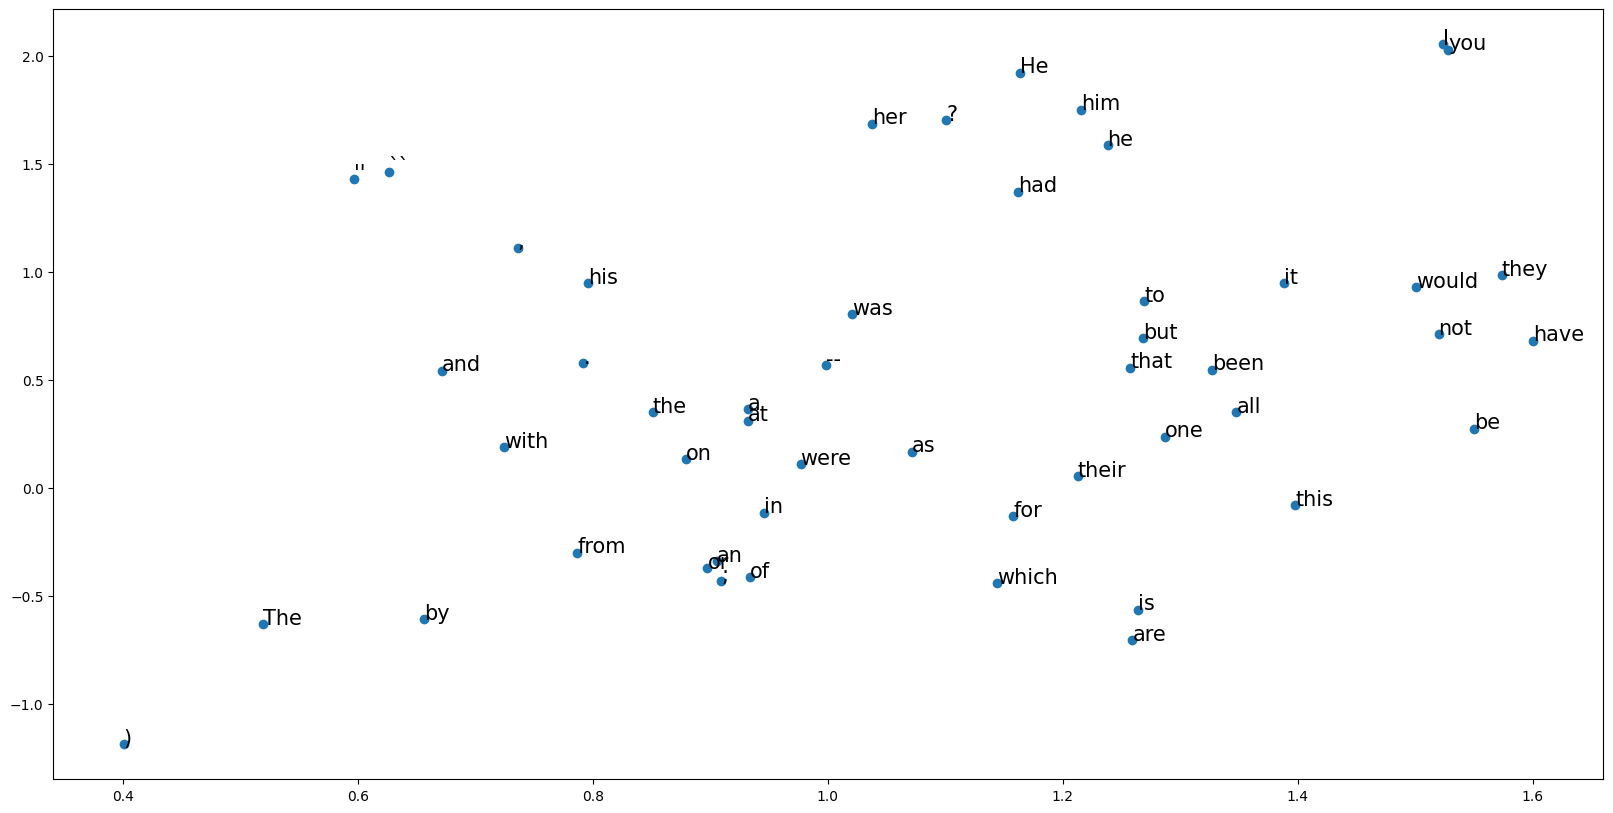

In [14]:

# Visualize

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

X = [skipgram_model.wv[key] for key in skipgram_model.wv.key_to_index]

pca = PCA(n_components=2)

result = pca.fit_transform(X)

fig = plt.figure(figsize=(20,10))

plt.scatter(result[:50, 0], result[:50, 1])

words = list(skipgram_model.wv.index_to_key)[:50]

for i, word in enumerate(words):

    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=15)

plt.show()